In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

###### WTF ?

In [2]:
filePath = '../raw_data/Labels_MERL_Shopping_Dataset/1_1_label.mat';
data = scipy.io.loadmat(filePath)

In [3]:
data['tlabs']

array([[array([[ 156,  183],
               [ 434,  459],
               [ 914,  939],
               [1027, 1067],
               [1524, 1560],
               [1968, 2004],
               [2310, 2334],
               [2567, 2582],
               [2630, 2643],
               [2912, 2933],
               [3263, 3285],
               [3583, 3605],
               [ 376,  406],
               [ 686,  714],
               [1152, 1200],
               [2172, 2204],
               [2246, 2269],
               [2405, 2435],
               [2750, 2777],
               [2845, 2871],
               [2981, 3008],
               [3377, 3414]], dtype=uint16)],
       [array([[ 406,  416],
               [ 418,  433],
               [ 739,  764],
               [1247, 1289],
               [2273, 2300],
               [2440, 2458],
               [2782, 2798],
               [2876, 2890],
               [3014, 3030],
               [3425, 3445],
               [ 184,  211],
               [ 527,  561

In [4]:
data['tlabs'].shape

(5, 1)

In [5]:
data['tlabs'][0][0].shape

(22, 2)

- Chaque vidéo est segmentée en 5 actions référencées dans un fichier Matlab **(Frame du début à la Frame de fin)** ?

In [6]:
data['tlabs'][0][0][0]

array([156, 183], dtype=uint16)

In [7]:
# Frame from 156 to 183 correspond to Action "Reach to Shelf" for the first video ?

###### Export and check frame of the first video <br>
-> Is the Frame from 156 to 183 correspond to Action "Reach to Shelf" for the first video ? 

In [8]:
import cv2

In [9]:
video_path = '../raw_data/Videos_MERL_Shopping_Dataset/'

In [10]:
first_frame2action = data['tlabs'][0][0][0][0]

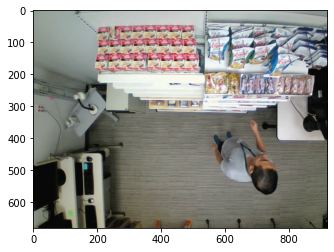

In [11]:
# First Frame of the action -> Reach to Shelf
cap = cv2.VideoCapture(f'{video_path}1_1_crop.mp4')
cap.set(1,first_frame2action);
ret, bgr_frame = cap.read()
rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)

In [12]:
last_frame2action = data['tlabs'][0][0][0][1]

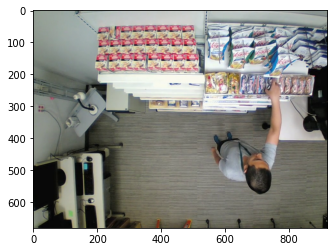

In [13]:
# Last Frame of the action -> Reach to Shelf
cap = cv2.VideoCapture(f'{video_path}1_1_crop.mp4')
cap.set(1, last_frame2action);
ret, bgr_frame = cap.read()
rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_frame)

In [14]:
# Get the action clip based on the frames indexes -> Reach to Shelf

In [15]:
fps = int(cap.get(cv2.CAP_PROP_FPS))
print(f'Fps: {fps}')

time_start = float(first_frame2action)/fps
print(f'Start_Action: {time_start}')

time_end = float(last_frame2action)/fps
print(f'End_Action: {time_end}')

Fps: 30
Start_Action: 5.2
End_Action: 6.1


In [16]:
from moviepy.editor import *

clip = VideoFileClip(f'{video_path}1_1_crop.mp4')
# Getting only the action
clip = clip.subclip(time_start, time_end)
# showing clip
clip.ipython_display(width = 360)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [17]:
directory = "Reach_to_shelf"
parent_dir = "../raw_data/"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

In [18]:
clip.write_videofile(f'{path}/test.mp4')

Moviepy - Building video ../raw_data/Reach_to_shelf/test.mp4.
Moviepy - Writing video ../raw_data/Reach_to_shelf/test.mp4



Moviepy - Done !
Moviepy - video ready ../raw_data/Reach_to_shelf/test.mp4


**Note:** <br>
Chaque vidéo est segmentée en 5 actions référencées dans un fichier Matlab **(Frame du début à la Frame de fin)** <br>
xx_yy_crop.mp4 == xx_yy_label.mat

1. Reach to shelf -> data['tlabs'][0]
2. Retract from shelf -> data['tlabs'][1]
3. Hand in shelf -> data['tlabs'][2]
4. Inspect product -> data['tlabs'][3]
5. Inspect Shelf -> data['tlabs'][4]

**Idea:** <br>
-Cut each video to clip -> 1 clip per action ?

**Steps:** <br>
-Lier chaque vidéo à son fichier matlab<br>
-Exporter le numéro des frames correspondant aux actions -> */Display in a dataframe* ?<br>
-Ouvrir chaque vidéo<br>
-Cutting each vidéo (From frames F1 to Frames Fn) by actions -> **import moviepy**<br>
-Rename each clip with the syntax xx_yy_ACTIONNUMBER_INCREMENTALENUMBER.mp4<br>
-Save each clip in different folder based on action<br>